# Chapter 3: Binary thresholing

## Converting a grayscale image to a binary image

Binary thresholding is the process of converting a grayscale image into a binary image. 
This conversion is done by picking a specic threshold value that is in the range of the pixel intensityes, i.e between 0 and 64k for a 16-bit image. All the pixles in the image that have an intesntsy value below this threhshols are set to 0 and the intensity values above this threshold are set to 1. 

To binary threshold can be accomplished with the comparivete operator `<` or `>`, which returns a boolean values pixels meeting the condisiton. For exampale:

(-0.5, 383.5, 302.5, -0.5)

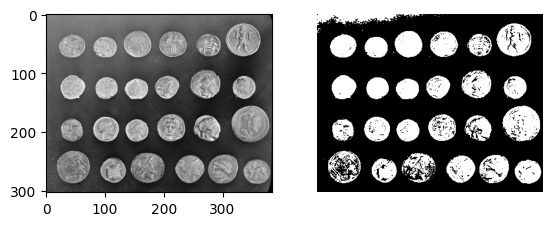

In [12]:
# Load the required libraries
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt

# Load the coins data
img = ski.data.coins()

img_thresh = img > 125


fig, ax =  plt.subplots(1, 2)
ax[0].imshow(img, cmap = 'gray')
ax[1].imshow(img_thresh, cmap = 'gray')
plt.axis('off')

The threshold valeu detwinmine what is retained in the output binary image. When a low threshershed is piclked more pixels in the output image have a value of 1, and simiarly, whem ehan a higher threhsold is picled few pixels ar rettained. Let us expeirmnt whith a few differnt thehrehold vlaues.

Now that we have seen how to bimary threshold an image and the imapt of the thresholes vaoue, how can the pick out the optimal threhesl vulue. Most ofthem is this accompliched from the intensity histoftam of the inpout imate. 

## Finding a binary threshold from the image histogram

By looking at the histogram we can get an estimate of pixle intensitites in the image. Most importantly, since we are binary threhsolding
an image, we can get a sense of the number of of pixles that will be above or below a specicl cutoff. 
For example, from the aboge histogram, we can easily see that picking a value of 200 was too high and it retiened too few pixels as explected
and piocleing avlaue of less than 100 is likely too low. A threougld of approxliamtely 125 looks optimal for our puropoists. 

Though we can look at a histogram and manually experiment with what a an onpotimal threhdld might be, it is too slow and sublbecive. THerefoeur,
we need an need an autmated metric to detemine a threshold from an image histogram. Three are several metrics that accmomptksh this taks. 
The most commomly uses anmog this is the Otsu threhsold.

### Otsu thresholding

107


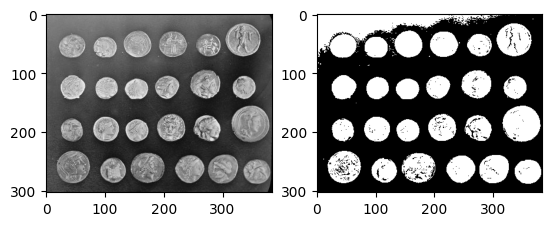

In [39]:
# Load the coins data
img = ski.data.coins()
# img = ski.io.imread("data/F01_202w1.TIF")

# get the otsu threshold
otsu_thresh = ski.filters.threshold_otsu(img)
print(otsu_thresh)

# threshold the image
img_otsu = img > otsu_thresh

# plot 
fig, ax =  plt.subplots(1, 2)
ax[0].imshow(img, cmap = 'gray')
ax[1].imshow(img_otsu, cmap = 'gray')

### Triangle thresholding

Triangle trheshold is a bit more lineant than Otsu threhdold, i.e, the triange threshold value is usually lower thena the Otsu, and hence the threhsoilded image contains more foregorund pixeles. 

80


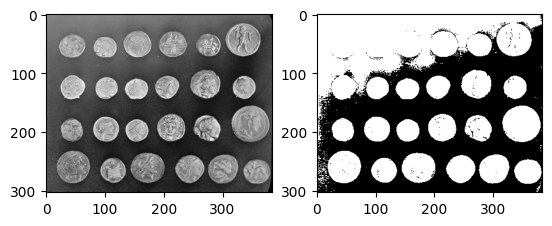

In [42]:
# Load the coins data
img = ski.data.coins()
# img = ski.io.imread("data/F01_202w1.TIF")

# get the triangle threshold
triangle_thresh = ski.filters.threshold_triangle(img)
print(triangle_thresh)

# threshold the image
img_triangle = img > triangle_thresh

fig, ax =  plt.subplots(1, 2)
ax[0].imshow(img, cmap = 'gray')
ax[1].imshow(img_triangle, cmap = 'gray')

### Picking the the "right" metric
While the Otsu and Trianlge thresholding appraoches are widely uses, there are several other appaucah athat are available as well: . 

Picking the right metric relly depemnds on your downstream application. If it is important to retaina as many foregorund pixles as possionl (that can later be pirned, if mecidarat) then it is bettwe to shose  a more lioneant methods. On the other hand, if we are comcinet about gettting as little backgournd ad possible, then it is better to choose a more conviewnt methods. When deisgning an image analyusis pipeline it is commpon to test several differnt oappruahces pricr to picking an optimal metic. 

As an example let us test tese metrics on our cell images.

438
203


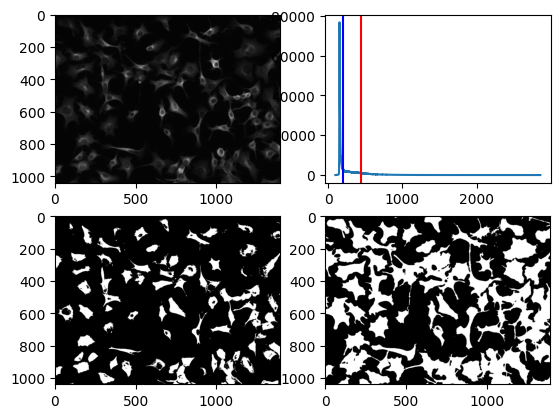

In [57]:
# Load the cell images
img = ski.io.imread("data/F01_202w1.TIF")

# get the image histogram
hist, hist_centers = ski.exposure.histogram(img)

# get the Otsu threshold
otsu_thresh = ski.filters.threshold_otsu(img)
print(otsu_thresh)
# threshold the image
img_otsu = img > otsu_thresh

# get the triangle threshold
triangle_thresh = ski.filters.threshold_triangle(img)
print(triangle_thresh)
# threshold the image
img_triangle = img > triangle_thresh

fig, ax =  plt.subplots(2, 2)
ax[0, 0].imshow(img, cmap = 'gray')
ax[0, 1].plot(hist_centers, hist)
ax[0, 1].axvline(otsu_thresh, color='r')
ax[0, 1].axvline(triangle_thresh, color='b')
ax[1, 0].imshow(img_otsu, cmap = 'gray')
ax[1, 1].imshow(img_triangle, cmap = 'gray')